# South Korea (Korea Selatan)

## Basic Data (Import and Visualization)

### Start (Importing Libraries)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

### Read data and Plotting

In [2]:
df = pd.read_csv('/Users/abdul/Documents/Academics/Metnum/UTS/dataset/csv/skorea.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(41, 5)

In [4]:
df.columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df

,Confirmed,New,Deaths,Active
Date,,,,
2020-02-15,28,0,0,19
2020-02-16,29,1,0,20
2020-02-17,30,1,0,20
2020-02-18,31,1,0,19
2020-02-19,58,27,0,42
2020-02-20,111,53,1,94
2020-02-21,209,98,2,190
2020-02-22,436,227,2,416
2020-02-23,602,166,6,578


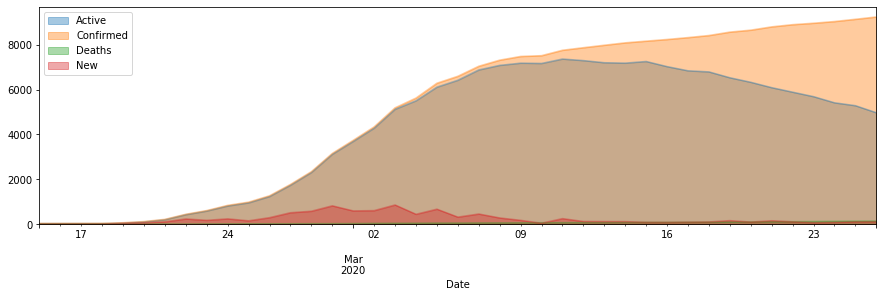

In [6]:
df.plot.area(y=["Active", "Confirmed", "Deaths", "New"], figsize=(15,4), alpha=0.4, subplots=False, stacked=False)

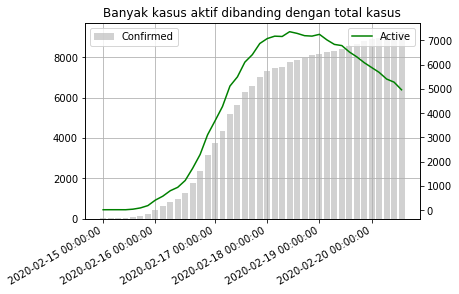

In [7]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(df.index, df["Confirmed"], color=(190/255,190/255,190/255,0.7), label='Confirmed')
ax2.plot(df.index, df["Active"], color='green', label='Active')
ax.set_xticklabels(df.index)
ax.legend(loc='best')
ax2.legend(loc='best')
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set_title('Banyak kasus aktif dibanding dengan total kasus')
fig.autofmt_xdate()

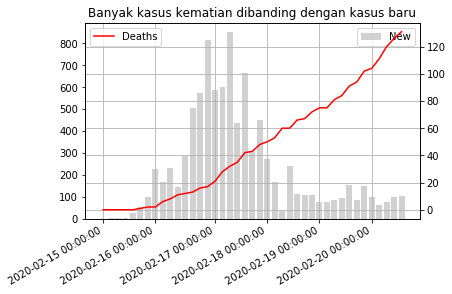

In [8]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()
ax3.bar(df.index, df["New"], color=(190/255,190/255,190/255,0.7), label='New')
ax4.plot(df.index, df["Deaths"], color='red', label='Deaths')
ax3.set_xticklabels(df.index)
ax3.legend(loc='best')
ax4.legend(loc='best')
ax3.xaxis.grid(True)
ax4.yaxis.grid(True)
ax3.set_title('Banyak kasus kematian dibanding dengan kasus baru')
fig.autofmt_xdate()

## Regressions

### Active (Tren Naik)

- Start: 15-Feb-2020
- End: 11-Mar-2020
- Range: 41 Days

**Data**

In [9]:
y = np.array ((19, 20, 20, 19, 42, 94, 190, 416, 578, 803, 944, 1225, 1729, 2297, 3109, 3685, 4277, 5120, 5498, 6107, 6415, 6875, 7079, 7178, 7165, 7362))
y = y.astype('float64')
y

array([  19.,   20.,   20.,   19.,   42.,   94.,  190.,  416.,  578.,
        803.,  944., 1225., 1729., 2297., 3109., 3685., 4277., 5120.,
       5498., 6107., 6415., 6875., 7079., 7178., 7165., 7362.])

In [10]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

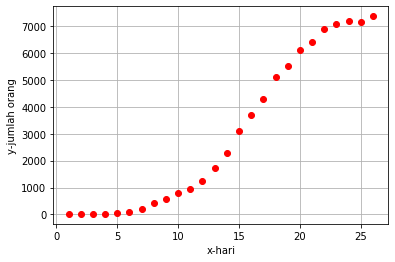

In [11]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [12]:
y = np.array ((19, 20, 20, 19, 42, 94, 190, 416, 578, 803, 944, 1225, 1729, 2297, 3109, 3685, 4277, 5120, 5498, 6107, 6415, 6875, 7079, 7178, 7165, 7362))
y = y.astype('float64')
y

array([  19.,   20.,   20.,   19.,   42.,   94.,  190.,  416.,  578.,
        803.,  944., 1225., 1729., 2297., 3109., 3685., 4277., 5120.,
       5498., 6107., 6415., 6875., 7079., 7178., 7165., 7362.])

In [13]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

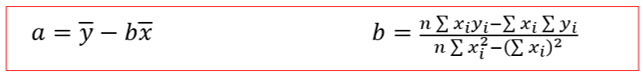

**Membuat xreg untuk plotting selanjutnya**

In [14]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

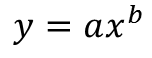

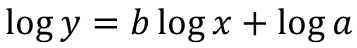

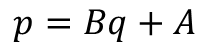

In [15]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [16]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [17]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 2.4908q + 0.4120


**Kembalikan ke bentuk pangkat**

In [18]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 2.5820x^(2.4908)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [19]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9563 dan r^2 = 0.9145


**Plot**

In [20]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([2.58199667e+00, 3.27383966e+00, 4.06613608e+00, 4.96327180e+00,
       5.96944990e+00, 7.08871159e+00, 8.32495343e+00, 9.68194162e+00,
       1.11633242e+01, 1.27726415e+01, 1.45133347e+01, 1.63887542e+01,
       1.84021658e+01, 2.05567572e+01, 2.28556429e+01, 2.53018694e+01,
       2.78984189e+01, 3.06482137e+01, 3.35541193e+01, 3.66189475e+01,
       3.98454596e+01, 4.32363686e+01, 4.67943421e+01, 5.05220039e+01,
       5.44219367e+01, 5.84966833e+01, 6.27487489e+01, 6.71806026e+01,
       7.17946784e+01, 7.65933775e+01, 8.15790689e+01, 8.67540907e+01,
       9.21207519e+01, 9.76813324e+01, 1.03438085e+02, 1.09393236e+02,
       1.15548986e+02, 1.21907511e+02, 1.28470962e+02, 1.35241468e+02,
       1.42221136e+02, 1.49412049e+02, 1.56816272e+02, 1.64435846e+02,
       1.72272795e+02, 1.80329123e+02, 1.88606813e+02, 1.97107833e+02,
       2.05834131e+02, 2.14787639e+02, 2.23970270e+02, 2.33383923e+02,
       2.43030480e+02, 2.52911806e+02, 2.63029754e+02, 2.73386159e+02,
      

Text(0, 0.5, 'y-banyak orang')

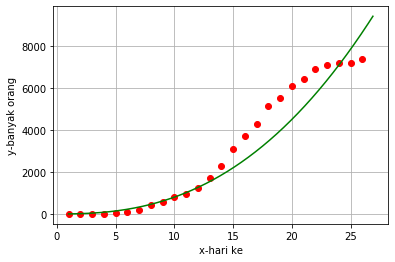

In [21]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

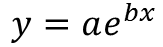

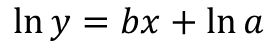

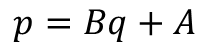

**Linearisasi**

In [22]:
y = np.array ((19, 20, 20, 19, 42, 94, 190, 416, 578, 803, 944, 1225, 1729, 2297, 3109, 3685, 4277, 5120, 5498, 6107, 6415, 6875, 7079, 7178, 7165, 7362))
y = y.astype('float64')
y

array([  19.,   20.,   20.,   19.,   42.,   94.,  190.,  416.,  578.,
        803.,  944., 1225., 1729., 2297., 3109., 3685., 4277., 5120.,
       5498., 6107., 6415., 6875., 7079., 7178., 7165., 7362.])

In [23]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

In [24]:
p = np.log(y)
q = x

**Hitung regresi linear**

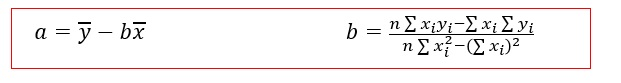

In [25]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [26]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.2684q + 3.1942


**Hitung kembali dalam bentuk bilangan berpangkat**

In [27]:
a = np.e**A
b = B

In [28]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 24.3911x^(0.2684)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [29]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9407 dan r^2 = 0.8848


**Plot data dan regresinya**

In [30]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [31]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([2.43910792e+01, 2.50545751e+01, 2.57361197e+01, 2.64362039e+01,
       2.71553321e+01, 2.78940223e+01, 2.86528066e+01, 2.94322317e+01,
       3.02328591e+01, 3.10552654e+01, 3.19000432e+01, 3.27678009e+01,
       3.36591637e+01, 3.45747737e+01, 3.55152906e+01, 3.64813917e+01,
       3.74737731e+01, 3.84931497e+01, 3.95402557e+01, 4.06158456e+01,
       4.17206940e+01, 4.28555970e+01, 4.40213721e+01, 4.52188591e+01,
       4.64489206e+01, 4.77124427e+01, 4.90103356e+01, 5.03435344e+01,
       5.17129993e+01, 5.31197170e+01, 5.45647008e+01, 5.60489916e+01,
       5.75736587e+01, 5.91398004e+01, 6.07485449e+01, 6.24010511e+01,
       6.40985095e+01, 6.58421428e+01, 6.76332070e+01, 6.94729926e+01,
       7.13628247e+01, 7.33040648e+01, 7.52981113e+01, 7.73464006e+01,
       7.94504084e+01, 8.16116501e+01, 8.38316829e+01, 8.61121058e+01,
       8.84545618e+01, 9.08607381e+01, 9.33323683e+01, 9.58712327e+01,
       9.84791603e+01, 1.01158030e+02, 1.03909771e+02, 1.06736366e+02,
      

Text(0, 0.5, 'y-banyak orang')

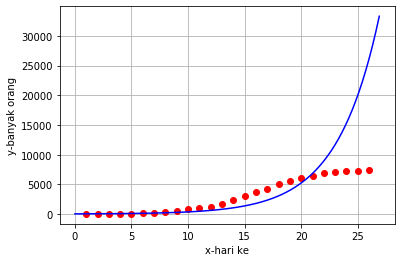

In [32]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [33]:
y = np.array ((19, 20, 20, 19, 42, 94, 190, 416, 578, 803, 944, 1225, 1729, 2297, 3109, 3685, 4277, 5120, 5498, 6107, 6415, 6875, 7079, 7178, 7165, 7362))
y = y.astype('float64')
y

array([  19.,   20.,   20.,   19.,   42.,   94.,  190.,  416.,  578.,
        803.,  944., 1225., 1729., 2297., 3109., 3685., 4277., 5120.,
       5498., 6107., 6415., 6875., 7079., 7178., 7165., 7362.])

In [34]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.])

**Membentuk regresi polinomial dari matriks**

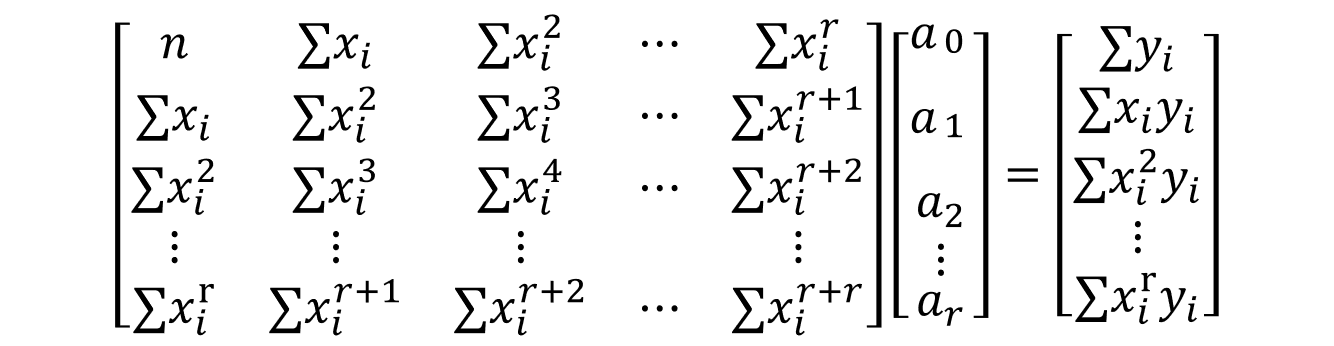

**Mendefinisikan elemen-elemen matriks kiri**

In [35]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[2.6000000e+01, 3.5100000e+02, 6.2010000e+03, 1.2320100e+05],
       [3.5100000e+02, 6.2010000e+03, 1.2320100e+05, 2.6106210e+06],
       [6.2010000e+03, 1.2320100e+05, 2.6106210e+06, 5.7617001e+07],
       [1.2320100e+05, 2.6106210e+06, 5.7617001e+07, 1.3077971e+09]])

**Mendefinisikan elemen-elemen matriks kanan**

In [36]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[7.82660000e+04],
       [1.58723500e+06],
       [3.36571730e+07],
       [7.37351833e+08]])

**Invers matriks sisi kiri**

In [37]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 8.33110368e-01, -2.35061315e-01,  1.77257525e-02,
        -3.90189521e-04],
       [-2.35061315e-01,  8.25185444e-02, -6.83724072e-03,
         1.58645748e-04],
       [ 1.77257525e-02, -6.83724072e-03,  5.99105209e-04,
        -1.44158690e-05],
       [-3.90189521e-04,  1.58645748e-04, -1.44158690e-05,
         3.55947382e-07]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [38]:
Y = Ainv.dot(B)
print(Y)

[[ 998.42943144]
 [-565.44759861]
 [  69.63622273]
 [  -1.46943024]]


In [39]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [40]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = -1.4694x^3 + 69.6362X^2 + -565.4476x + 998.4294


In [41]:
y

array([  19.,   20.,   20.,   19.,   42.,   94.,  190.,  416.,  578.,
        803.,  944., 1225., 1729., 2297., 3109., 3685., 4277., 5120.,
       5498., 6107., 6415., 6875., 7079., 7178., 7165., 7362.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [42]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9956 dan r^2 = 0.8848


**Plot**

Text(0, 0.5, 'y')

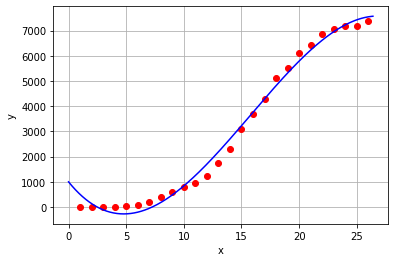

In [43]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

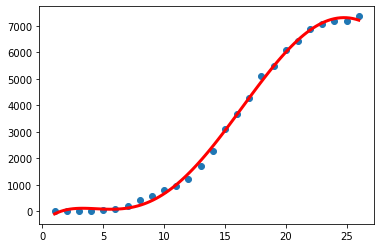

In [44]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [45]:
print (regpoly)

          5          4         3       2
0.005194 x - 0.4569 x + 12.77 x - 120 x + 437 x - 420.6


In [46]:
print(r2_score(y, regpoly(x)))

0.9983282644820523


**Selesai**

### Active (Tren Turun)

- Start: 11-Mar-2020
- End: 11-Mar-2020
- Range: 16 Days

**Data**

In [47]:
y = np.array ((7362, 7293, 7198, 7180, 7253, 7024, 6838, 6789, 6527, 6325, 6085, 5884, 5684, 5410, 5281, 4966))
y = y.astype('float64')
y

array([7362., 7293., 7198., 7180., 7253., 7024., 6838., 6789., 6527.,
       6325., 6085., 5884., 5684., 5410., 5281., 4966.])

In [48]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

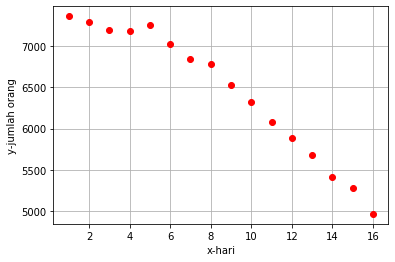

In [49]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [50]:
y = np.array ((7362, 7293, 7198, 7180, 7253, 7024, 6838, 6789, 6527, 6325, 6085, 5884, 5684, 5410, 5281, 4966))
y = y.astype('float64')
y

array([7362., 7293., 7198., 7180., 7253., 7024., 6838., 6789., 6527.,
       6325., 6085., 5884., 5684., 5410., 5281., 4966.])

In [51]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

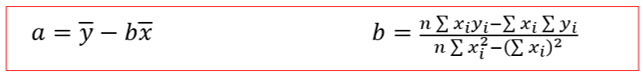

**Membuat xreg untuk plotting selanjutnya**

In [52]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

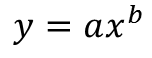

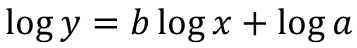

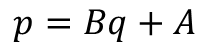

In [53]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [54]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [55]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = -0.1351q + 3.9183


**Kembalikan ke bentuk pangkat**

In [56]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 8286.0661x^(-0.1351)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [57]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.8268 dan r^2 = 0.6835


**Plot**

In [58]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([8286.06609707, 8180.02012538, 8084.39325397, 7997.41256234,
       7917.71556759, 7844.23347765, 7776.11304045, 7712.66266299,
       7653.31430698, 7597.59593874, 7545.11121881, 7495.52426859,
       7448.54806794, 7403.93549546, 7361.47232273, 7320.97167417,
       7282.2696004 , 7245.22150783, 7209.69925373, 7175.58876385,
       7142.78806394, 7111.20564223, 7080.75907831, 7051.3738884 ,
       7022.9825473 , 6995.52365567, 6968.94122763, 6943.18407841,
       6918.20529572, 6893.96178157, 6870.4138535 , 6847.52489639,
       6825.26105722, 6803.59097672, 6782.48555261, 6761.91773015,
       6741.8623163 , 6722.29581437, 6703.19627656, 6684.543172  ,
       6666.31726857, 6648.50052668, 6631.07600359, 6614.02776717,
       6597.34081784, 6581.00101789, 6564.99502736, 6549.31024568,
       6533.9347586 , 6518.85728969, 6504.06715606, 6489.55422786,
       6475.30889109, 6461.32201355, 6447.58491347, 6434.08933065,
       6420.8273999 , 6407.79162647, 6394.97486339, 6382.37029

Text(0, 0.5, 'y-banyak orang')

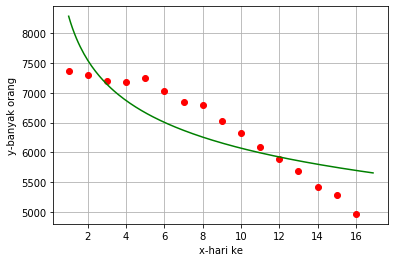

In [59]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

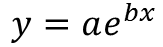

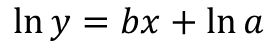

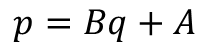

**Linearisasi**

In [60]:
y = np.array ((7362, 7293, 7198, 7180, 7253, 7024, 6838, 6789, 6527, 6325, 6085, 5884, 5684, 5410, 5281, 4966))
y = y.astype('float64')
y

array([7362., 7293., 7198., 7180., 7253., 7024., 6838., 6789., 6527.,
       6325., 6085., 5884., 5684., 5410., 5281., 4966.])

In [61]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

In [62]:
p = np.log(y)
q = x

**Hitung regresi linear**

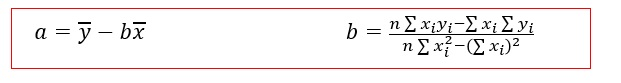

In [63]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [64]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = -0.0262q + 8.9858


**Hitung kembali dalam bentuk bilangan berpangkat**

In [65]:
a = np.e**A
b = B

In [66]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 7988.6148x^(-0.0262)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [67]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9662 dan r^2 = 0.9335


**Plot data dan regresinya**

In [68]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [69]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([7988.61479106, 7967.72943613, 7946.89868367, 7926.12239092,
       7905.4004155 , 7884.73261541, 7864.118849  , 7843.55897503,
       7823.05285258, 7802.60034114, 7782.20130053, 7761.85559098,
       7741.56307304, 7721.32360767, 7701.13705615, 7681.00328015,
       7660.92214169, 7640.89350316, 7620.9172273 , 7600.99317722,
       7581.12121638, 7561.30120859, 7541.53301804, 7521.81650925,
       7502.1515471 , 7482.53799683, 7462.97572403, 7443.46459464,
       7424.00447496, 7404.59523162, 7385.23673161, 7365.92884227,
       7346.67143128, 7327.46436668, 7308.30751683, 7289.20075047,
       7270.14393664, 7251.13694476, 7232.17964456, 7213.27190615,
       7194.41359993, 7175.60459669, 7156.84476751, 7138.13398385,
       7119.47211747, 7100.85904049, 7082.29462536, 7063.77874484,
       7045.31127206, 7026.89208045, 7008.5210438 , 6990.1980362 ,
       6971.92293209, 6953.69560623, 6935.51593371, 6917.38378995,
       6899.29905068, 6881.26159197, 6863.27129021, 6845.32802

Text(0, 0.5, 'y-banyak orang')

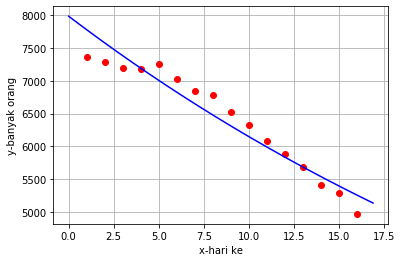

In [70]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [71]:
y = np.array ((7362, 7293, 7198, 7180, 7253, 7024, 6838, 6789, 6527, 6325, 6085, 5884, 5684, 5410, 5281, 4966))
y = y.astype('float64')
y

array([7362., 7293., 7198., 7180., 7253., 7024., 6838., 6789., 6527.,
       6325., 6085., 5884., 5684., 5410., 5281., 4966.])

In [72]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

**Membentuk regresi polinomial dari matriks**

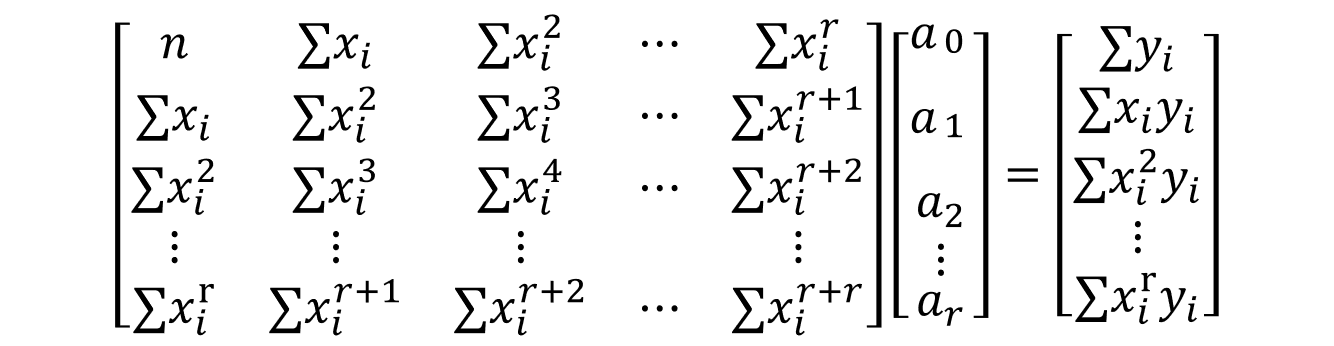

**Mendefinisikan elemen-elemen matriks kiri**

In [73]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[1.6000000e+01, 1.3600000e+02, 1.4960000e+03, 1.8496000e+04],
       [1.3600000e+02, 1.4960000e+03, 1.8496000e+04, 2.4384800e+05],
       [1.4960000e+03, 1.8496000e+04, 2.4384800e+05, 3.3477760e+06],
       [1.8496000e+04, 2.4384800e+05, 3.3477760e+06, 4.7260136e+07]])

**Mendefinisikan elemen-elemen matriks kanan**

In [74]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[1.03099000e+05],
       [8.20688000e+05],
       [8.64518800e+06],
       [1.03811552e+08]])

**Invers matriks sisi kiri**

In [75]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 1.66208791e+00, -7.49542125e-01,  9.06593407e-02,
        -3.20512821e-03],
       [-7.49542125e-01,  4.05623000e-01, -5.32179808e-02,
         1.97026629e-03],
       [ 9.06593407e-02, -5.32179808e-02,  7.34443575e-03,
        -2.81151597e-04],
       [-3.20512821e-03,  1.97026629e-03, -2.81151597e-04,
         1.10255528e-05]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [76]:
Y = Ainv.dot(B)
print(Y)

[[ 7.25708516e+03]
 [ 6.98373899e+01]
 [-2.12267178e+01]
 [ 4.99725464e-01]]


In [77]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [78]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.4997x^3 + -21.2267X^2 + 69.8374x + 7257.0852


In [79]:
y

array([7362., 7293., 7198., 7180., 7253., 7024., 6838., 6789., 6527.,
       6325., 6085., 5884., 5684., 5410., 5281., 4966.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [80]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9978 dan r^2 = 0.9335


**Plot**

Text(0, 0.5, 'y')

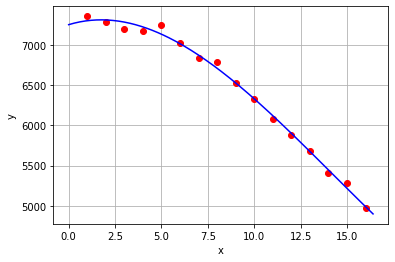

In [81]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

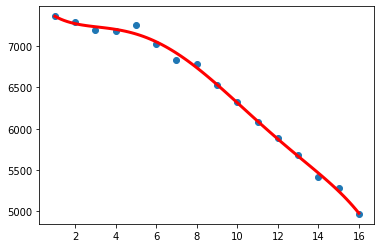

In [82]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [83]:
print (regpoly)

          5         4         3         2
-0.02434 x + 1.083 x - 17.04 x + 103.6 x - 296.8 x + 7573


In [84]:
print(r2_score(y, regpoly(x)))

0.997122510455871


**Selesai**

### Total Death

- Start: 20-Feb-2020
- End: 26-Mar-2020
- Range: 36 Days

**Data**

In [85]:
y = np.array ((1, 2, 2, 6, 8, 11, 12, 13, 16, 17, 21, 28, 32, 35, 42, 43, 48, 50, 53, 60, 60, 66, 67, 72, 75, 75, 81, 84, 91, 94, 102, 104, 111, 120, 126, 131))
y = y.astype('float64')
y

array([  1.,   2.,   2.,   6.,   8.,  11.,  12.,  13.,  16.,  17.,  21.,
        28.,  32.,  35.,  42.,  43.,  48.,  50.,  53.,  60.,  60.,  66.,
        67.,  72.,  75.,  75.,  81.,  84.,  91.,  94., 102., 104., 111.,
       120., 126., 131.])

In [86]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

**Plot**

Text(0, 0.5, 'y-jumlah orang')

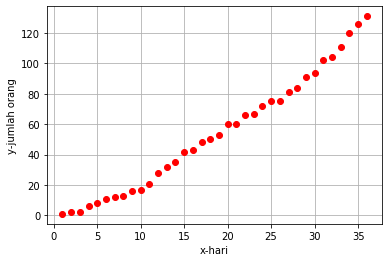

In [87]:
ax = plt.plot(x,y,'ro')
plt.grid()
plt.xlabel('x-hari')
plt.ylabel('y-jumlah orang')

#### Regresi Berpangkat

**Data**

In [88]:
y = np.array ((1, 2, 2, 6, 8, 11, 12, 13, 16, 17, 21, 28, 32, 35, 42, 43, 48, 50, 53, 60, 60, 66, 67, 72, 75, 75, 81, 84, 91, 94, 102, 104, 111, 120, 126, 131))
y = y.astype('float64')
y

array([  1.,   2.,   2.,   6.,   8.,  11.,  12.,  13.,  16.,  17.,  21.,
        28.,  32.,  35.,  42.,  43.,  48.,  50.,  53.,  60.,  60.,  66.,
        67.,  72.,  75.,  75.,  81.,  84.,  91.,  94., 102., 104., 111.,
       120., 126., 131.])

In [89]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

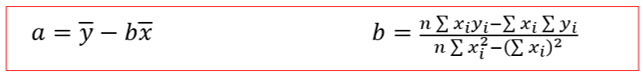

**Membuat xreg untuk plotting selanjutnya**

In [90]:
#membuat xreg
xreg = np.array(range(10,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2,
       15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16

**Regresi berpangkat**

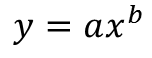

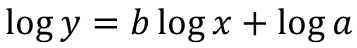

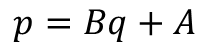

In [91]:
p = np.log10(y)
q = np.log10(x)

**Hitung regresi linear**

In [92]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil regresi linear**

In [93]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 1.4363q -0.1288


**Kembalikan ke bentuk pangkat**

In [94]:
a = 10**A #A=log(a)
b = B
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 0.7434x^(1.4363)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [95]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9944 dan r^2 = 0.9889


**Plot**

In [96]:
#membuat yreg
yreg = a*(xreg**b)
yreg
    

array([  0.74342277,   0.85249176,   0.96597913,   1.083673  ,
         1.20538749,   1.3309579 ,   1.46023698,   1.59309208,
         1.72940298,   1.86906001,   2.01196266,   2.15801838,
         2.30714159,   2.45925285,   2.61427819,   2.77214851,
         2.93279906,   3.09616903,   3.26220116,   3.43084142,
         3.60203871,   3.77574463,   3.95191321,   4.13050077,
         4.31146571,   4.49476834,   4.68037078,   4.86823679,
         5.05833167,   5.25062216,   5.44507635,   5.64166357,
         5.84035434,   6.04112027,   6.24393402,   6.44876922,
         6.65560042,   6.86440305,   7.07515335,   7.28782834,
         7.50240577,   7.71886411,   7.93718248,   8.15734062,
         8.37931889,   8.60309822,   8.82866005,   9.0559864 ,
         9.28505972,   9.51586299,   9.74837962,   9.98259344,
        10.21848872,  10.45605012,  10.69526267,  10.93611179,
        11.17858322,  11.42266309,  11.66833779,  11.91559408,
        12.16441899,  12.41479984,  12.66672426,  12.92

Text(0, 0.5, 'y-banyak orang')

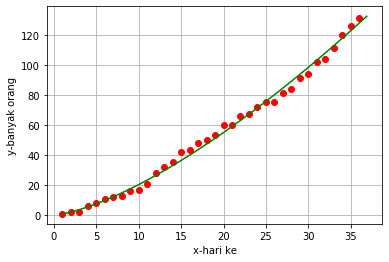

In [97]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'g')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

#### Regresi Eksponensial

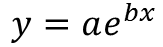

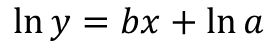

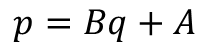

**Linearisasi**

In [98]:
y = np.array ((1, 2, 2, 6, 8, 11, 12, 13, 16, 17, 21, 28, 32, 35, 42, 43, 48, 50, 53, 60, 60, 66, 67, 72, 75, 75, 81, 84, 91, 94, 102, 104, 111, 120, 126, 131))
y = y.astype('float64')
y

array([  1.,   2.,   2.,   6.,   8.,  11.,  12.,  13.,  16.,  17.,  21.,
        28.,  32.,  35.,  42.,  43.,  48.,  50.,  53.,  60.,  60.,  66.,
        67.,  72.,  75.,  75.,  81.,  84.,  91.,  94., 102., 104., 111.,
       120., 126., 131.])

In [99]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

In [100]:
p = np.log(y)
q = x

**Hitung regresi linear**

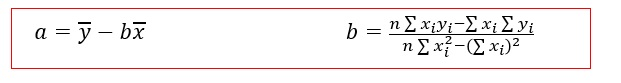

In [101]:
n = len(y)
pq = p*q
qq = q**2
B = (n*pq.sum() - q.sum()*p.sum())/(n*qq.sum() - (q.sum())**2)
A = p.mean()-B*q.mean()

**Hasil persamaan linear**

In [102]:
if A>0 :
    print ("p = {:.4f}q + {:.4f}". format(B,A))
else :
    print ("p = {:.4f}q {:.4f}". format(B,A))

p = 0.1084q + 1.5171


**Hitung kembali dalam bentuk bilangan berpangkat**

In [103]:
a = np.e**A
b = B

In [104]:
print ("y = {:.4f}x^({:.4f})".format(a,b))

y = 4.5590x^(0.1084)


**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [105]:
yDt = ((p - p.mean())**2).sum()
yD = ((p - (q*B) - A)**2).sum()
r = np.sqrt((yDt-yD)/yDt)
r2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9138 dan r^2 = 0.8350


**Plot data dan regresinya**

In [106]:
#membuat xreg
xreg = np.array(range(0,int((x[-1]+1)*10)))
xreg = xreg/10 #memperhalus bentuk garis
xreg = xreg.astype('float64')
xreg

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [107]:
#membuat yreg
yreg = a*np.e**(b*xreg)
yreg

array([  4.55898799,   4.60867844,   4.6589105 ,   4.70969006,
         4.76102309,   4.81291561,   4.86537374,   4.91840364,
         4.97201153,   5.02620371,   5.08098657,   5.13636652,
         5.19235009,   5.24894384,   5.30615444,   5.3639886 ,
         5.42245312,   5.48155487,   5.5413008 ,   5.60169793,
         5.66275335,   5.72447424,   5.78686786,   5.84994153,
         5.91370267,   5.97815877,   6.04331741,   6.10918624,
         6.175773  ,   6.24308553,   6.31113172,   6.37991958,
         6.44945719,   6.51975272,   6.59081443,   6.66265068,
         6.7352699 ,   6.80868064,   6.8828915 ,   6.95791123,
         7.03374863,   7.11041261,   7.1879122 ,   7.26625648,
         7.34545467,   7.42551608,   7.50645012,   7.58826629,
         7.67097421,   7.7545836 ,   7.83910429,   7.92454621,
         8.0109194 ,   8.09823401,   8.1865003 ,   8.27572864,
         8.36592953,   8.45711355,   8.54929143,   8.642474  ,
         8.7366722 ,   8.83189712,   8.92815993,   9.02

Text(0, 0.5, 'y-banyak orang')

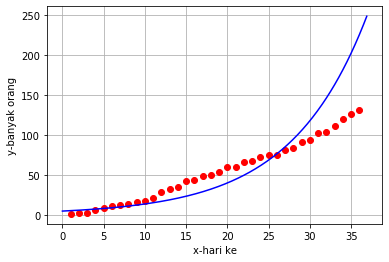

In [108]:
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x-hari ke')
plt.ylabel('y-banyak orang')

**Selesai**

#### Regresi Polinomial

In [109]:
y = np.array ((1, 2, 2, 6, 8, 11, 12, 13, 16, 17, 21, 28, 32, 35, 42, 43, 48, 50, 53, 60, 60, 66, 67, 72, 75, 75, 81, 84, 91, 94, 102, 104, 111, 120, 126, 131))
y = y.astype('float64')
y

array([  1.,   2.,   2.,   6.,   8.,  11.,  12.,  13.,  16.,  17.,  21.,
        28.,  32.,  35.,  42.,  43.,  48.,  50.,  53.,  60.,  60.,  66.,
        67.,  72.,  75.,  75.,  81.,  84.,  91.,  94., 102., 104., 111.,
       120., 126., 131.])

In [110]:
x = np.array((range(1,1+len(y))))
x = x.astype('float64')
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36.])

**Membentuk regresi polinomial dari matriks**

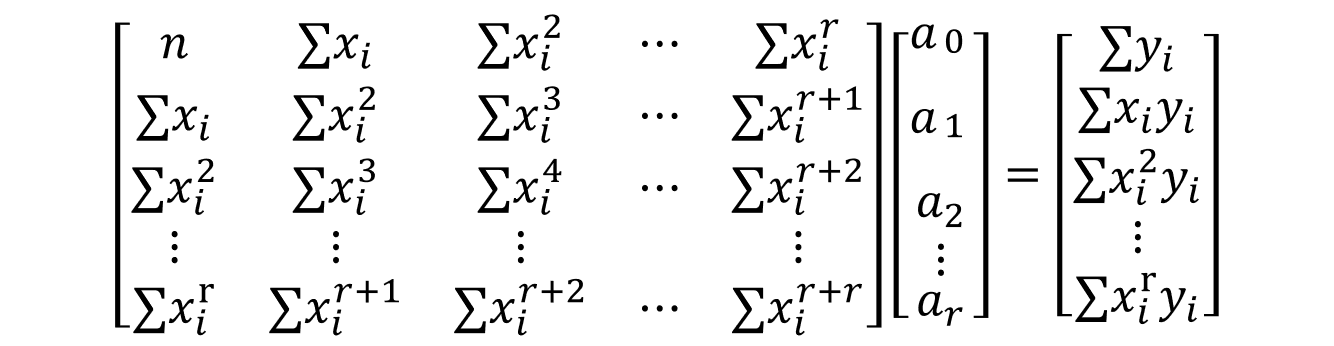

**Mendefinisikan elemen-elemen matriks kiri**

In [111]:
n = len(y)
a = x.sum()
b = (x**2).sum()
c = (x**3).sum()
d = (x**4).sum()
e = (x**5).sum()
f = (x**6).sum()
A = np.array(([n, a, b, c],
    [a, b, c, d],
    [b, c, d, e],
    [c, d, e, f]))
A

array([[3.60000000e+01, 6.66000000e+02, 1.62060000e+04, 4.43556000e+05],
       [6.66000000e+02, 1.62060000e+04, 4.43556000e+05, 1.29485940e+07],
       [1.62060000e+04, 4.43556000e+05, 1.29485940e+07, 3.93729876e+08],
       [4.43556000e+05, 1.29485940e+07, 3.93729876e+08, 1.23134971e+10]])

**Mendefinisikan elemen-elemen matriks kanan**

In [112]:
g = y.sum()
h = (x*y).sum()
i = ((x**2)*y).sum()
j = ((x**3)*y).sum()
B = np.array(([g],
    [h],
    [i],
    [j]))
B

array([[1.9590000e+03],
       [5.0520000e+04],
       [1.4248120e+06],
       [4.2395712e+07]])

**Invers matriks sisi kiri**

In [113]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 5.51481199e-01, -1.13134143e-01,  6.19641796e-03,
        -9.90295108e-05],
       [-1.13134143e-01,  2.93935562e-02, -1.77983924e-03,
         3.00769135e-05],
       [ 6.19641796e-03, -1.77983924e-03,  1.14246244e-04,
        -2.00464597e-06],
       [-9.90295108e-05,  3.00769135e-05, -2.00464597e-06,
         3.61197472e-08]])

**Mencari nilai a0, a1, a2, dst dengan a = (A^-1)B namun di sini variabel a diganti dengan Y**

In [114]:
Y = Ainv.dot(B)
print(Y)

[[-4.88116459e+00]
 [ 2.52852739e+00]
 [ 1.23310247e-02]
 [ 5.65624405e-04]]


In [115]:
a0 = Y[0,0]
a1 = Y[1,0]
a2 = Y[2,0]
a3 = Y[3,0]

**Hasil persamaan regresi polinomial**

In [116]:
print('y = {:.4f}x^3 + {:.4f}X^2 + {:.4f}x + {:.4f}'.format(a3, a2, a1, a0))

y = 0.0006x^3 + 0.0123X^2 + 2.5285x + -4.8812


In [117]:
y

array([  1.,   2.,   2.,   6.,   8.,  11.,  12.,  13.,  16.,  17.,  21.,
        28.,  32.,  35.,  42.,  43.,  48.,  50.,  53.,  60.,  60.,  66.,
        67.,  72.,  75.,  75.,  81.,  84.,  91.,  94., 102., 104., 111.,
       120., 126., 131.])

**Koefisien Korelasi ( r ) dan Derajat Kesesuaian ( R ) r-square**

In [118]:
yDt = (y-y.mean())**2
yD = (y-a0-a1*x-a2*(x**2)-a3*(x**3))**2
r = np.sqrt((yDt.sum()-yD.sum())/yDt.sum())
R2 = r**2
print('r = {:.4f} dan r^2 = {:.4f}'.format(r,r2))

r = 0.9977 dan r^2 = 0.8350


**Plot**

Text(0, 0.5, 'y')

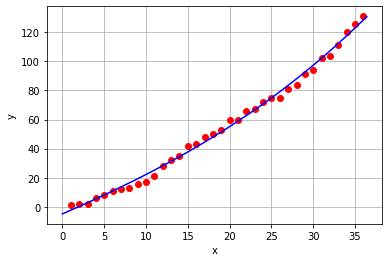

In [119]:
xreg = np.array(range(0,int((x[-1]+0.5)*10)))
xreg = xreg/10
yreg = a0 + a1*xreg + a2*(xreg**2) + a3*(xreg**3)
ax = plt.plot(x,y,'ro')
plt.plot(xreg,yreg,'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

**Perbandingan jika memakai polyfit dengan derajat dinaikkan**

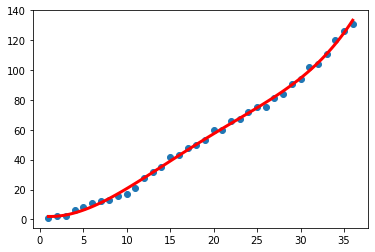

In [120]:
regpoly = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, len(y), 100)

plt.scatter(x, y)
plt.plot(myline, regpoly(myline), linewidth=3, color='r')
plt.show()

In [121]:
print (regpoly)

           5             4           3         2
1.873e-06 x + 8.288e-05 x - 0.01265 x + 0.386 x - 0.8804 x + 2.475


In [122]:
print(r2_score(y, regpoly(x)))

0.9980827221250798


**Selesai**